Average ARPI_D1: 0.0159
Average ARPI_D14: 0.3359
Estimated ARPI_D28 (LTV): 0.6804


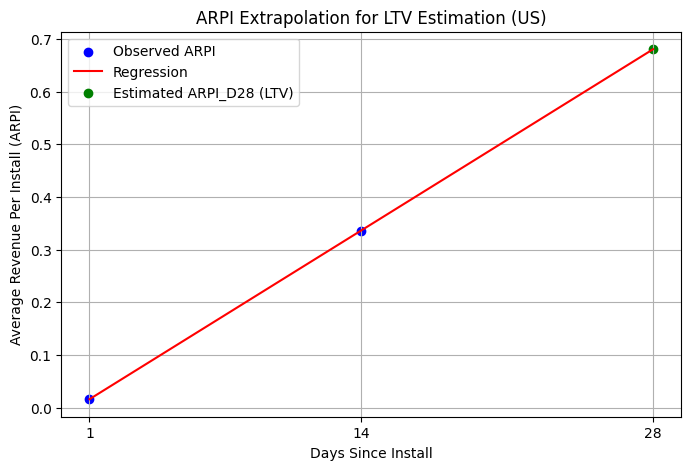

In [9]:
#%%
# LTV Estimation for US Users in Fruit Battle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load summary.csv
df = pd.read_csv('summary.csv')

# Filter for Fruit Battle, US, and date range
df_us = df[
    (df['client'] == 'fruit_battle') &
    (df['country'] == 'US') &
    (df['year'] == 2021) &
    (df['month'] == 12) &
    (df['day'] >= 1) & (df['day'] <= 15)
]

#%%
# Prepare ARPI values for regression
# For each cohort (install date), we have ARPI_D1 and ARPI_D14
arpi_days = np.array([1, 14])
arpi_values = df_us[['arpi_d1', 'arpi_d14']].mean().values  # average across cohorts

# Fit a linear regression to ARPI growth (can also try log or other models)
X = arpi_days.reshape(-1, 1)
y = arpi_values
reg = LinearRegression().fit(X, y)

# Predict ARPI_D28 (LTV estimate)
arpi_d28 = reg.predict(np.array([[28]]))[0]

print(f"Average ARPI_D1: {arpi_values[0]:.4f}")
print(f"Average ARPI_D14: {arpi_values[1]:.4f}")
print(f"Estimated ARPI_D28 (LTV): {arpi_d28:.4f}")

#%%
# Visualize ARPI curve and regression
plt.figure(figsize=(8,5))
plt.scatter(arpi_days, arpi_values, color='blue', label='Observed ARPI')
plt.plot([1, 14, 28], reg.predict(np.array([[1],[14],[28]])), color='red', label='Regression')
plt.scatter([28], [arpi_d28], color='green', label='Estimated ARPI_D28 (LTV)')
plt.xticks([1, 14, 28])
plt.xlabel('Days Since Install')
plt.ylabel('Average Revenue Per Install (ARPI)')
plt.title('ARPI Extrapolation for LTV Estimation (US)')
plt.legend()
plt.grid(True)
plt.show()
